# Logistic Regression 

Logistic regression is a statistical method used for binary classification, which means it is used to predict the probability of an event occurring or not. It is a type of generalized linear model that is used when the dependent variable is binary or categorical.

In logistic regression, the dependent variable is binary (i.e., it can take on one of two values, usually 0 or 1), and the independent variables can be either continuous or categorical. The goal of logistic regression is to find the relationship between the independent variables and the dependent variable by estimating the probability of the dependent variable being 1 given the values of the independent variables.

The logistic regression model uses a logistic function (also known as the sigmoid function) to map the input values of the independent variables to a value between 0 and 1, which represents the probability of the dependent variable being 1. The logistic function is defined as:
$$ p = \frac{1}{1 + e^{-z}} $$
where p is the predicted probability of the dependent variable being 1, e is the base of the natural logarithm, and z is the linear combination of the independent variables.

The logistic regression model estimates the values of the coefficients of the independent variables that maximize the likelihood of observing the data given the model. This is typically done using maximum likelihood estimation or gradient descent optimization.

Once the model is trained, it can be used to make predictions on new data by inputting the values of the independent variables into the logistic function and obtaining the predicted probability of the dependent variable being 1. The model can then classify the new observation as 1 or 0 based on a threshold probability value that is chosen by the user.



## Code 

In [21]:
import torch
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # shape: [N, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Visulization
import numpy as np
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        probs = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="RdBu", edgecolor="k")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

### Pytorch version to achieve a binary classification via logistic regression

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
step=10, loss=0.5829
step=20, loss=0.4864
step=30, loss=0.4392
step=40, loss=0.4123
step=50, loss=0.3952
step=60, loss=0.3835
step=70, loss=0.3751
step=80, loss=0.3688
step=90, loss=0.3640


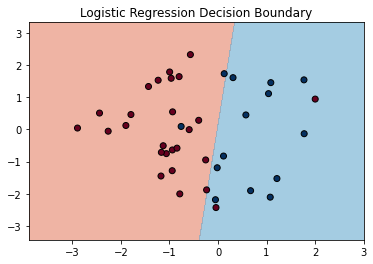

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Model
class LogisticRegression(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.linear = nn.Linear(in_features, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegression(2)
print(model)

# Training Loop
learning_rate = 0.1
optim_steps = 100
save_per_step = 10
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
for step in range(1, optim_steps):
    prediction = model(X_train)
    loss = loss_fn(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % save_per_step == 0:
        print(f"{step=}, loss={loss.item():.4f}")

# Visulization
plot_decision_boundary(model, X_test, y_test)




### Pure Python version to implement more details

Let’s walk through the gradient derivation and backpropagation process for logistic regression, step by step 


**Logistic Regression Basics**

Let’s define:

- Input features: $x \in \mathbb{R}^n$  
- Parameters: $w \in \mathbb{R}^n$, bias $b \in \mathbb{R}$  
- Output / logit:  $z = w^T x + b$
- Sigmoid (logistic function):  $\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$
- True label: $y \in \{0, 1\}$  
- Loss function: Binary Cross Entropy (BCE)  $\mathcal{L}(\hat{y}, y) = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})$

**Backpropagation (Gradient Derivation)**

We want to compute:

- $\frac{\partial \mathcal{L}}{\partial w}$
- $\frac{\partial \mathcal{L}}{\partial b}$

Let’s break it down using the chain rule:



🔸 Step 1: Derivative of loss w.r.t prediction $\hat{y}$

$$
\frac{\partial \mathcal{L}}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
$$



🔸 Step 2: Derivative of prediction w.r.t logit $z$

$$
\frac{d\hat{y}}{dz} = \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right) = \hat{y}(1 - \hat{y})
$$



🔸 Step 3: Chain Rule — $\frac{\partial \mathcal{L}}{\partial z}$

Instead of going the long route, we use a shortcut derived from combining BCE loss with sigmoid:

$$
\frac{\partial \mathcal{L}}{\partial z} = \hat{y} - y
$$

✅ This is a famous result in logistic regression:  
> *Gradient of loss w.r.t logits = prediction - label*



🔸 Step 4: Gradients w.r.t weights and bias

Since:

$$
z = w^T x + b
$$

Then:

- $\frac{\partial \mathcal{L}}{\partial w} = ( \hat{y} - y ) x$  
- $\frac{\partial \mathcal{L}}{\partial b} = \hat{y} - y$



**Gradient Descent Update Rule**

For a single example (or averaged over batch):

* $w = w - lr * grad_w$
* $b = b - lr * grad_b$


In [48]:
import numpy as np

class LogisticRegression2:
    def __init__(self, in_features):
        # PyTorch Linear uses uniform distribution for the init
        # https://github.com/pytorch/pytorch/blob/v2.6.0/torch/nn/modules/linear.py#L114
        self.weights = torch.zeros(in_features)
        self.bias = 0
        
    def fit(self, X, y, steps=100, lr=0.1):
        # gradient descent optimization
        n_samples = X.shape[0]
        for step in range(1, steps):
            y_pred = self.forward(X).float()

            # print(y_pred.shape)
            # print(y.view(-1).shape)

            loss = -1 / n_samples * torch.matmul(y.T, torch.log(y_pred)) + torch.matmul((1-y).T, torch.log(1 - y_pred))
            # calculate gradients
            dw = (1 / n_samples) * torch.matmul(X.T, (y_pred - y.view(-1)))
            db = (1 / n_samples) * torch.sum(y_pred - y.view(-1))
            
            # update weights and bias
            self.weights -= lr * dw
            self.bias -= lr * db

            if step % 10 == 0:
                print(f"{step=}, loss={loss.item():.4f}")
            
    def forward(self, X):
        return self._sigmoid(self._linear(X))
    
    def _sigmoid(self, z):
        return 1 / (1 + torch.exp(-z))
    
    def _linear(self, x):
        # `y = x * A^T + b`
        return torch.matmul(x, self.weights.T) + self.bias

model = LogisticRegression2(in_features=2)
model.fit(X_train, y_train)

step=10, loss=-40.4002
step=20, loss=-34.9989
step=30, loss=-32.2221
step=40, loss=-30.6057
step=50, loss=-29.5805
step=60, loss=-28.8891
step=70, loss=-28.4013
step=80, loss=-28.0449
step=90, loss=-27.7772


### Improvements 
here are some possible improvements you could make to the code:

1. Add regularization: Regularization can help prevent overfitting and improve the generalization performance of the model. You could add L1 or L2 regularization to the cost function and adjust the regularization strength with a hyperparameter. Here's an example of how to add L2 regularization to the code:

2. Use a more sophisticated optimization algorithm: Gradient descent is a simple and effective optimization algorithm, but it may not be the most efficient or accurate for large or complex datasets. You could try using a more sophisticated algorithm, such as stochastic gradient descent (SGD), mini-batch SGD, or Adam, which can converge faster and find better optima. Here's an example of how to use mini-batch SGD:

In [9]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_batches = n_samples // self.batch_size
        for i in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))
            if self.regularization == 'l2':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
                cost += reg_cost
            elif self.regularization == 'l1':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))
                cost += reg_cost
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
            if self.regularization == 'l2':
                dw += (self.reg_strength / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / n_samples) * np.sign(self.weights)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


This implementation includes the following improvements:

1. Regularization: You can choose between L1 or L2 regularization by setting the regularization parameter to either 'l1' or 'l2', and adjust the regularization strength with the reg_strength parameter.

2. Mini-batch stochastic gradient descent: The model uses mini-batch SGD (instead of simple gradient descent) to update the weights and bias, which can converge faster and find better optima.


### Test 

In [10]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]


[1 1]


## Visualize 

It is difficult to visualize logistic regression since it is a high-dimensional problem. However, we can visualize the decision boundary of a logistic regression model for a two-dimensional dataset.

Here's an example of how to visualize the decision boundary of the LogisticRegression class on a 2D dataset using the matplotlib library:

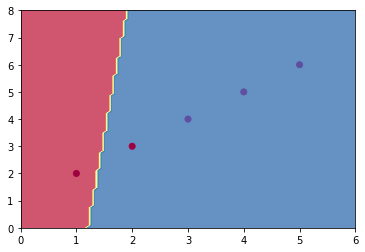

In [11]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()